<a href="https://colab.research.google.com/github/ranubansal/DSML-Projects/blob/main/Yulu_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yulu Case study**

https://colab.research.google.com/drive/1cZ_GTLEs39GrjKdKSMNeHXtTM8ZOENn_?usp=sharing

Introduction:
Yulu, India's pioneering micro-mobility service provider, has embarked on a mission to revolutionize daily commutes by offering unique, sustainable transportation solutions.
However, recent revenue setbacks have prompted Yulu to seek the expertise of a consulting company to delve into the factors influencing the demand for their shared electric cycles, specifically in the Indian market.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, geom, binom
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway, shapiro, levene, kruskal

from statsmodels.graphics.gofplots import qqplot


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

Datatype of following attributes needs to change to proper data type

 datetime - to datetime

 season - to categorical

 holiday - to categorical

 workingday - to categorical

 weather - to categorical


In [ ]:
df['datetime']= pd.to_datetime(df['datetime'])

In [ ]:
cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
  df[col]= df[col].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [ ]:
df['date']= df['datetime'].dt.date

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01


In [ ]:
df['time']= df['datetime'].dt.time

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00


In [ ]:
df.drop('datetime', axis=1, inplace= True)

In [ ]:
df['date'].max()

datetime.date(2012, 12, 19)

In [ ]:
df['date'].min()

datetime.date(2011, 1, 1)

In [ ]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  object 
 1   holiday     10886 non-null  object 
 2   workingday  10886 non-null  object 
 3   weather     10886 non-null  object 
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  date        10886 non-null  object 
 12  time        10886 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 1.1+ MB


In [ ]:
df.shape

(10886, 13)

In [ ]:
df['season'].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

shape of Data frame is (10886, 12)

There are no missing values in the dataset.

In casual upper bound is 116 and register is 501 . casual and registered attributes might have outliers because their mean and median are
very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes.



In [ ]:
df[cat_cols].melt().groupby(['variable','value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412







# **1. Uni-variate analysis**


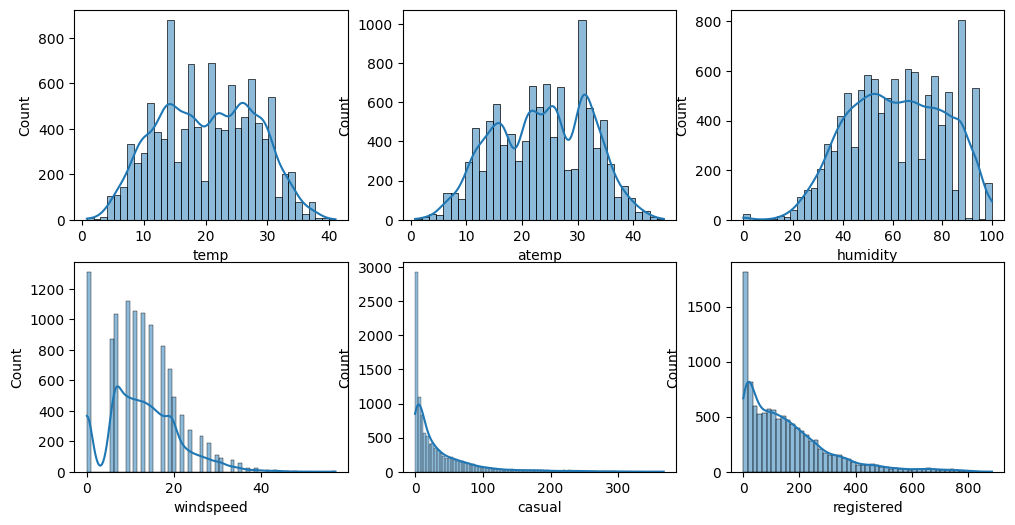

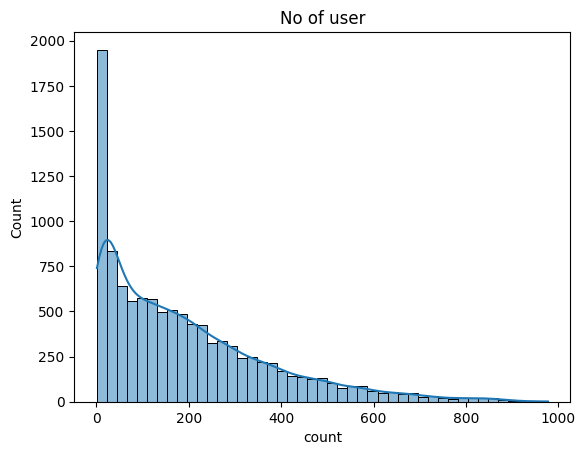

In [ ]:
num_cols=['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

index = 0
for row in range(2):
 for col in range(3):
  sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
  index += 1

plt.show()
sns.histplot(df[num_cols[-1]], kde=True)
plt.title('No of user')
plt.show()

casual, registered and count somewhat looks like Log Normal Distribution

temp, atemp and humidity looks like they follows the Normal Distribution


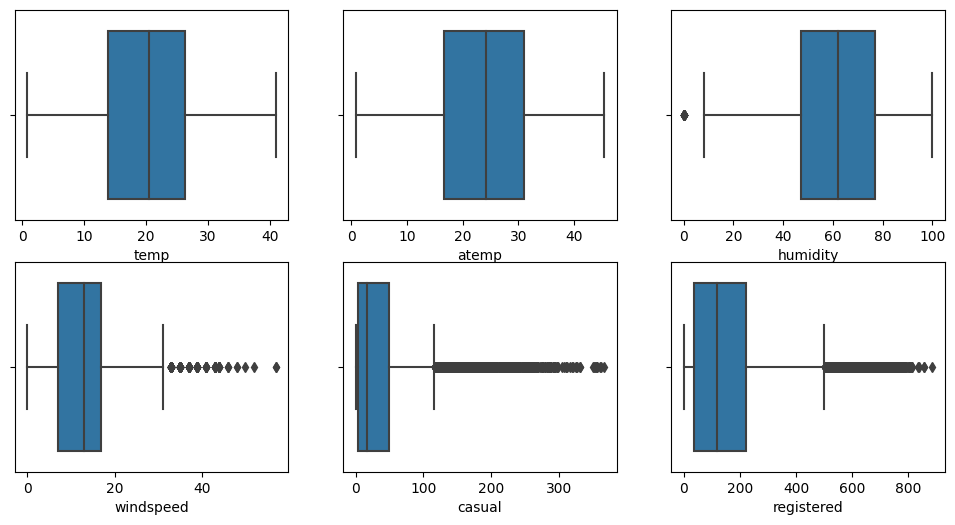

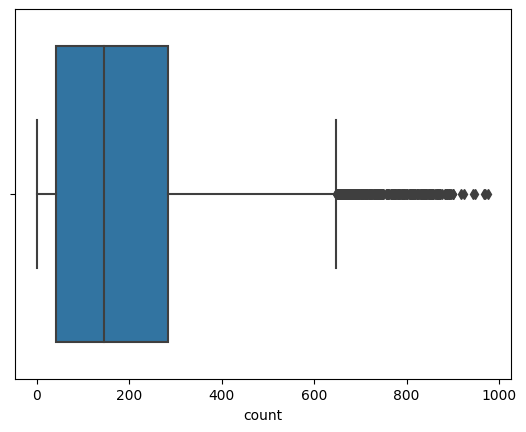

In [ ]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

index=0
for row in range(2):
  for col in range(3):
    sns.boxplot(x=df[num_cols[index]], ax= axis[row, col])
    index +=1

plt.show()
sns.boxplot(x= df[num_cols[-1]])
plt.show()




<Axes: xlabel='holiday', ylabel='count'>

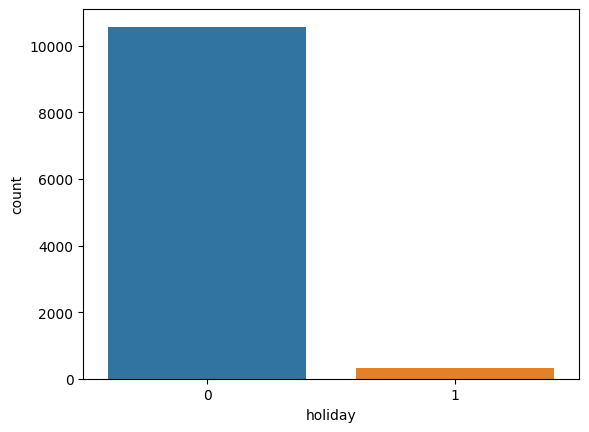

In [ ]:
sns.countplot(data= df, x='holiday')

<Axes: xlabel='workingday', ylabel='count'>

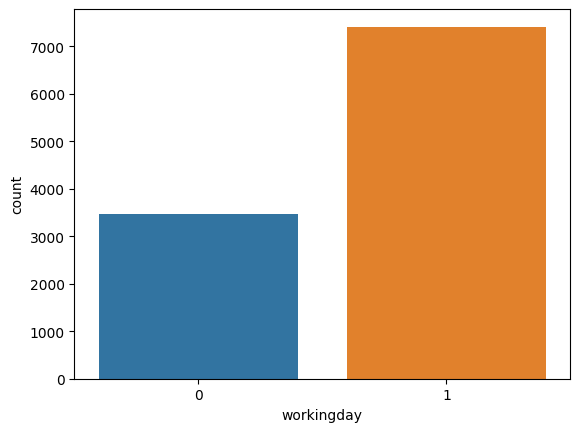

In [ ]:
sns.countplot(x='workingday', data= df)

<Axes: xlabel='season', ylabel='count'>

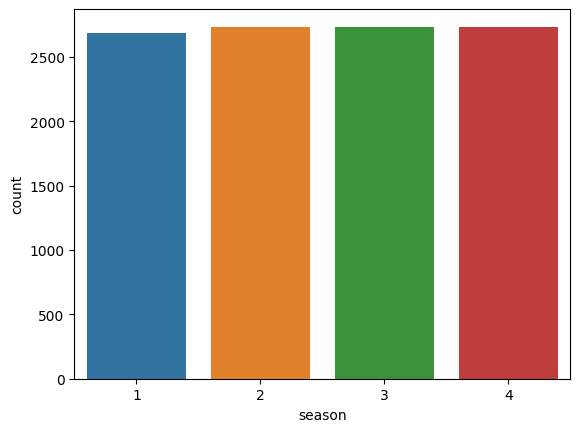

In [ ]:
sns.countplot(data=df, x='season')

<Axes: xlabel='weather', ylabel='count'>

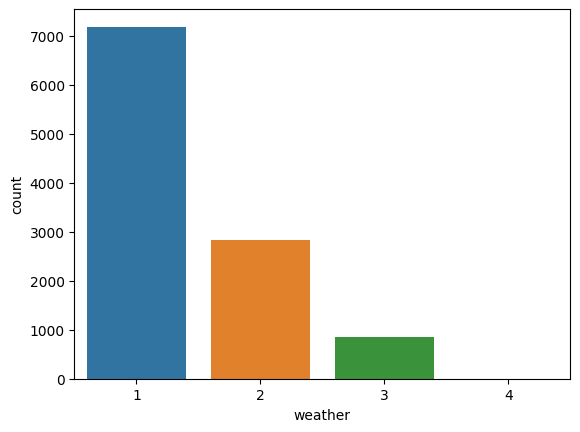

In [ ]:
sns.countplot(data=df, x='weather')

-7412 are working days and 3474 are not working days in which 311 days are holiday so 3163 days are weekends.




# **3. bi-variate analysis**

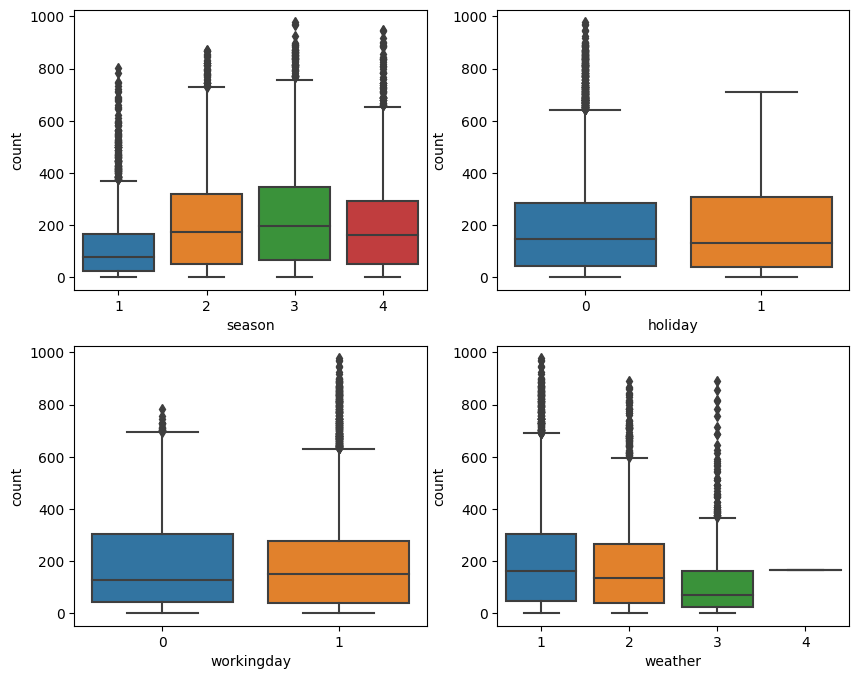

In [ ]:
# plotting categorical variables againt count using boxplots
cat_cols= ['season', 'holiday', 'workingday', 'weather']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
index = 0
for row in range(2):
 for col in range(2):
  sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row,col])
  index += 1

plt.show()


-In summer and fall seasons more bikes are rented as compared to other seasons.

- Whenever its a holiday more bikes are rented.

- It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
- Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.


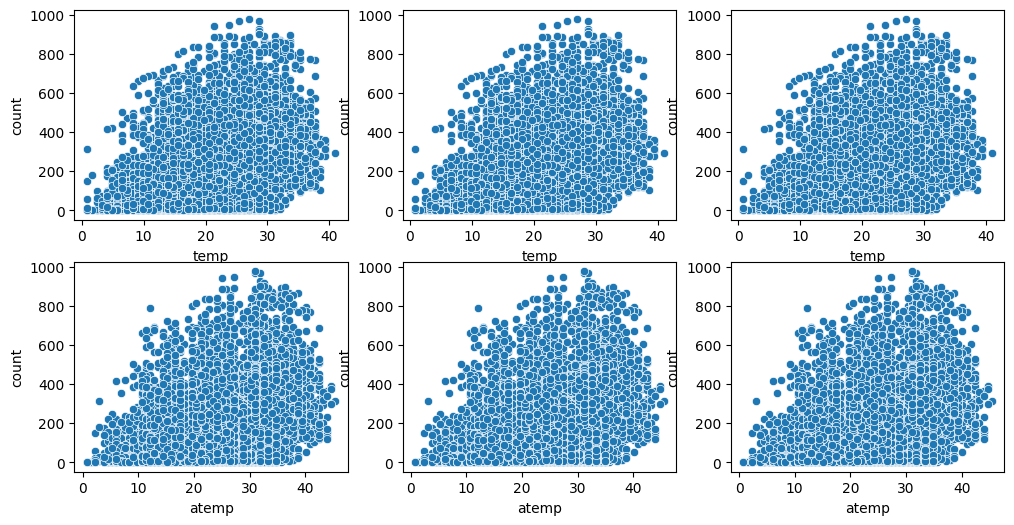

In [ ]:
# plotting numerical variables againt count using scatterplot
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
index = 0
for row in range(2):
 for col in range(3):
  sns.scatterplot(data=df, x=num_cols[index], y='count',ax=axis[row, col])
 index += 1

plt.show()


Whenever the humidity is less than 20, number of bikes rented is very very low.

Whenever the temperature is less than 10, number of bikes rented is less.

Whenever the windspeed is greater than 35, number of bikes rented is less.

<ipython-input-30-4f42cb76d763>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot=True)


<Axes: >

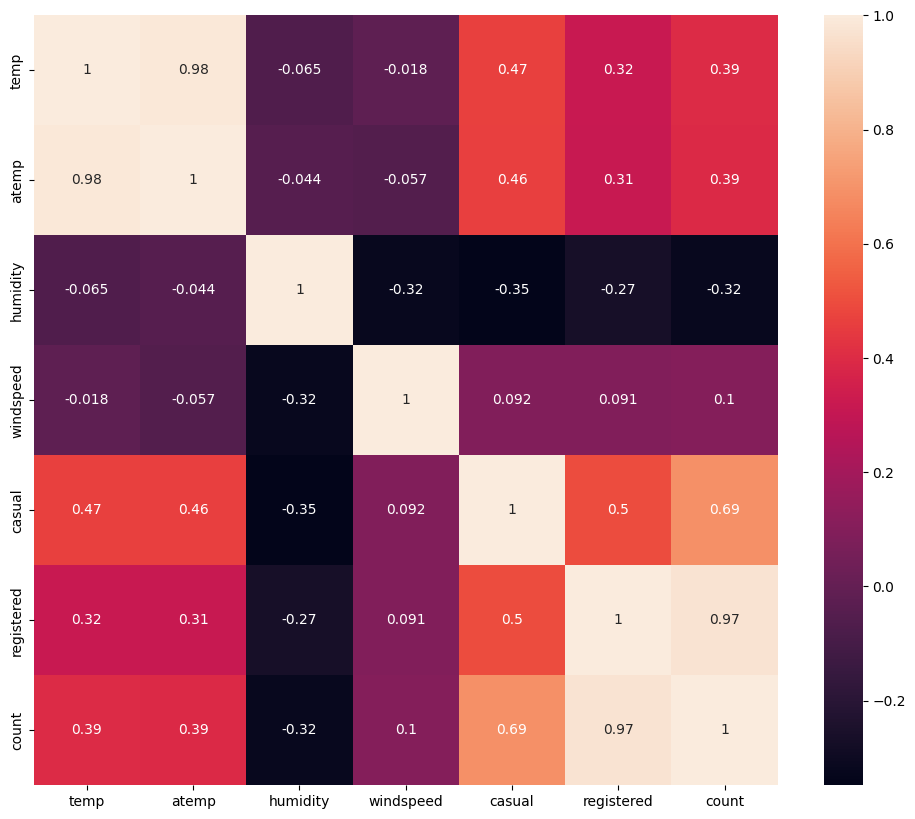

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr() , annot=True)

# **3: Hypothesis Testing:**
Chi-square test to check if Weather is dependent on the season

**Null Hypothesis (H0)**: Number of bicycle rented on weekday= Number of bicycle rented in weekend

**Alternate Hypothesis (H1)**: Number of bicycle rented on weekday != Number of bicycle rented in weekend

Significance level (alpha): 0.05


In [ ]:
weekday= df[(df['workingday']== 1)]['count']
weekend= df[(df['workingday']== 0) & (df['holiday']==0)]['count']

In [ ]:
weekday

47         5
48         2
49         1
50         3
51        30
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 7412, dtype: int64

In [ ]:
t_stat, p_value= ttest_ind(weekday, weekend, alternative='two-sided')

alpha= 0.05
print('p Value:', p_value )

if p_value<alpha:
  print('Reject Null Hypothesis')
else:
  print("Fail to reject Null - Accept Null Hypothesis")

p Value: 0.27065086640542324
Fail to reject Null - Accept Null Hypothesis


As the P value is higher than alpha we fail to reject Null Hypothesis. so the Null Hypothesis is true bicycle ride on weekday and weekend are same their is no significant difference between them

# 4 Demand of bicycles on rent is the same or not for different Weather conditions?


**HO Null hypothesis**: Bicycle rented on different weather is same

**H1 alternative hypothesis**: Bicycle rented on different weather is different

In [ ]:
clear_1= df[df['weather']== 1]['count']
mist_2= df[df['weather']== 2]['count']
snow_3= df[df['weather']== 3]['count']
rain_4= df[df['weather']== 4]['count']


In [ ]:
clear_1

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 7192, dtype: int64

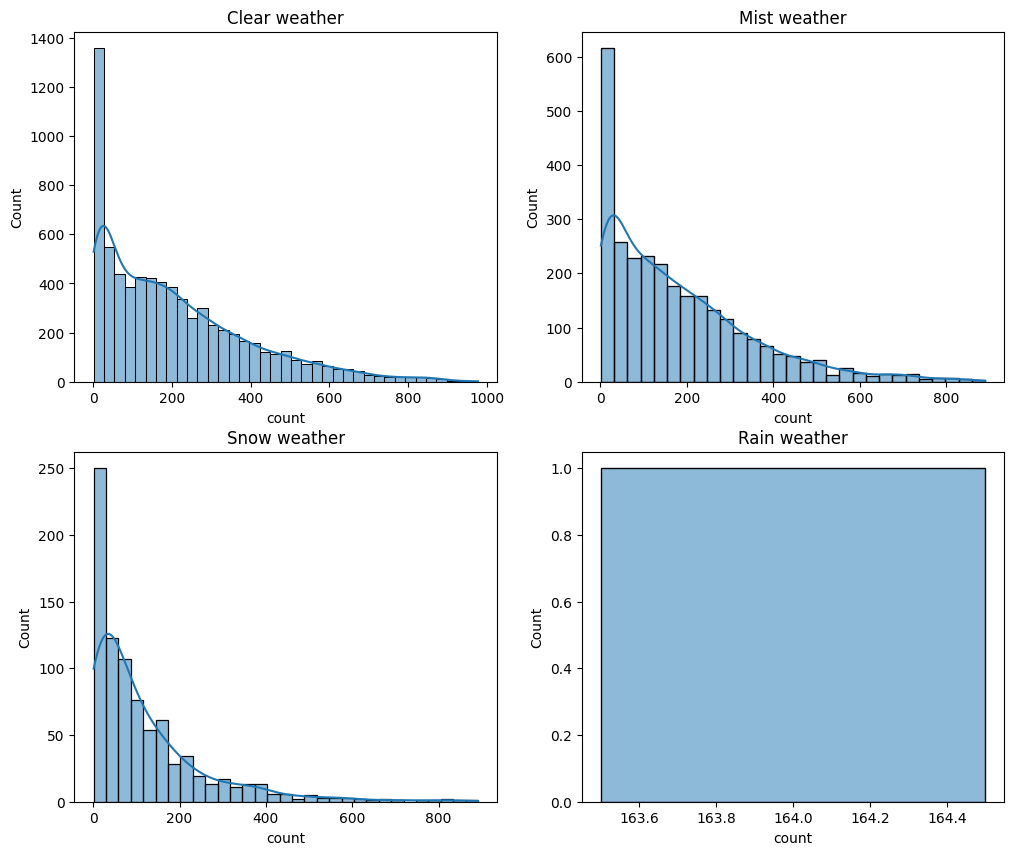

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.histplot(x=clear_1,kde=True)
plt.title('Clear weather')
plt.subplot(2,2,2)
sns.histplot(x= mist_2, kde= True)
plt.title('Mist weather')
plt.subplot(2,2,3)
sns.histplot(x= snow_3, kde= True)
plt.title('Snow weather')
plt.subplot(2,2,4)
sns.histplot(x= rain_4, kde= True)
plt.title('Rain weather')
plt.show()

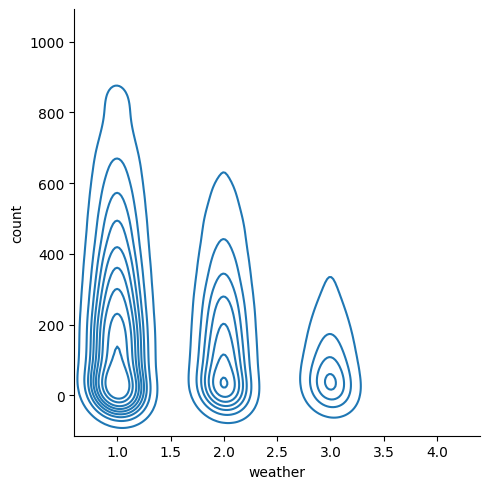

In [ ]:
sns.displot(data=df, x='weather', y='count', kind='kde')

As we can see from histrogram and displot weather data is not normally distributed . Now we will test for variance.


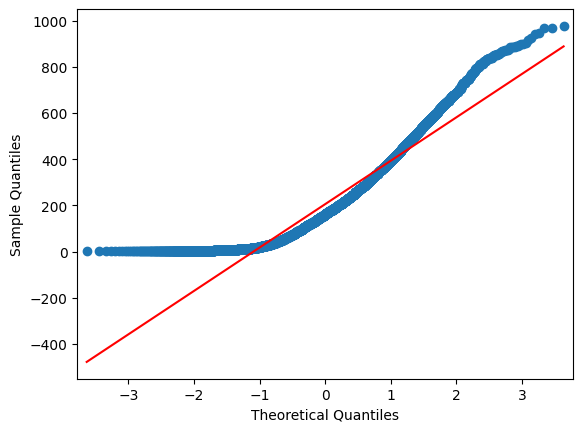

In [ ]:
qqplot(clear_1, line = 's')
plt.show()

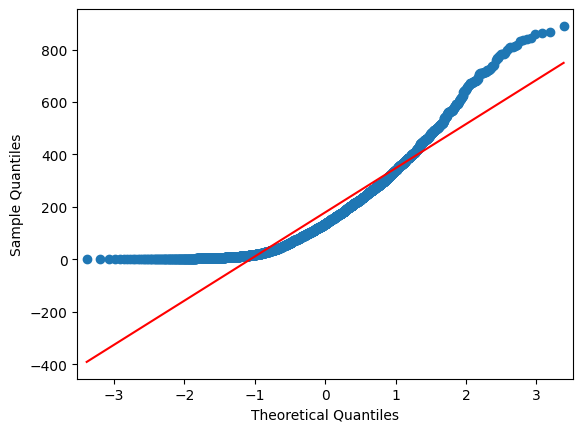

In [ ]:
qqplot(mist_2, line = 's')
plt.show()

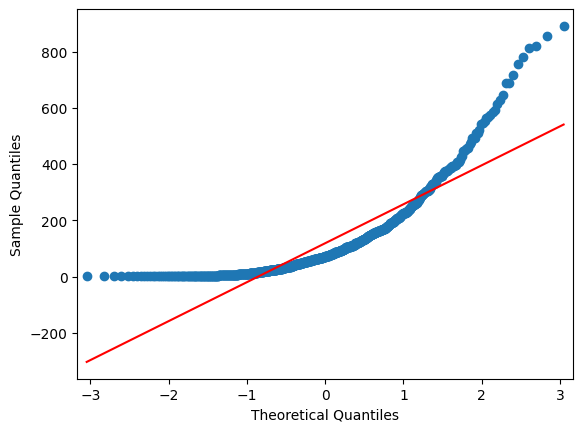

In [ ]:
qqplot(snow_3, line = 's')
plt.show()

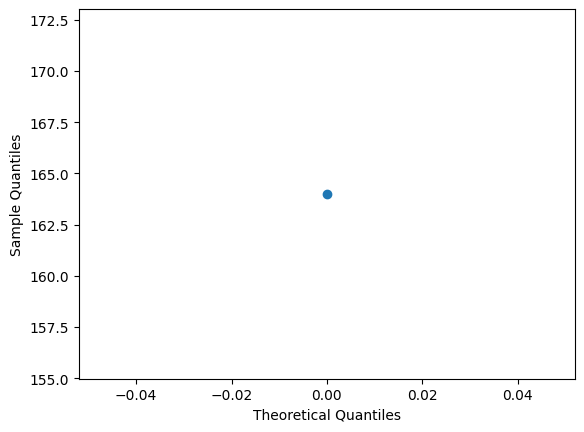

In [ ]:
qqplot(rain_4, line = 's')
plt.show()

From visul inspection test for nomality and equal variance is fail. Now we will do shapiroa and levene test

# Test for Normality


In [ ]:
# H0: Data is normally distributed
# H1: Data is non-normal
stat, p_value=shapiro(clear_1.sample(200))

alpha= 0.05
print('p Value:', p_value )

if p_value<alpha:
  print('Reject Null Hypothesis')
else:
  print("Fail to reject Null - Accept Null Hypothesis")

p Value: 3.489114552834849e-11
Reject Null Hypothesis


In [ ]:
stat, p_value= shapiro(mist_2.sample(200))

alpha= 0.05
print('p Value:', p_value )

if p_value<alpha:
  print('Reject Null Hypothesis')
else:
  print("Fail to reject Null - Accept Null Hypothesis")

p Value: 3.3791274899747092e-12
Reject Null Hypothesis


In [ ]:
stat, p_value= shapiro(snow_3.sample(200))
alpha= 0.05
print('p Value:', p_value )

if p_value<alpha:
  print('Reject Null Hypothesis')
else:
  print("Fail to reject Null - Accept Null Hypothesis")

p Value: 2.0367422053942905e-16
Reject Null Hypothesis


From shapiro test it can be concluded that data is not normally distributed.

# Levene Test- Test for variance

In [ ]:
levene_stat, p_value = levene(clear_1, mist_2, snow_3, rain_4)
print(p_value)
if p_value < 0.05:
 print("Reject the Null hypothesis.Variances are not equal")
else:
 print("Fail to Reject the Null hypothesis.Variances are equal")

3.504937946833238e-35
Reject the Null hypothesis.Variances are not equal


From levene test we can say that data do not have equal variance . Now we will perform Krushkal warries test

In [ ]:
kruskal_stat, p_value = kruskal(clear_1, mist_2, snow_3, rain_4)
print("p_value===",p_value)
if p_value<0.05:
 print("Since p-value is less than 0.05, we reject the null hypothesis")


p_value=== 3.501611300708679e-44
Since p-value is less than 0.05, we reject the null hypothesis


Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of bicycle rented is not similar in different weather conditions


#5  demand of bicycles on rent is the same or not for different Seasons?

**HO Null hypothesis**: Bicycle rented on different season is same

**H1 alternative hypothesis**: Bicycle rented on different season is different

In [ ]:
spring= df[df['season']== 1]['count']
summer= df[df['season']== 2]['count']
fall= df[df['season']== 3]['count']
winter= df[df['season']== 4]['count']

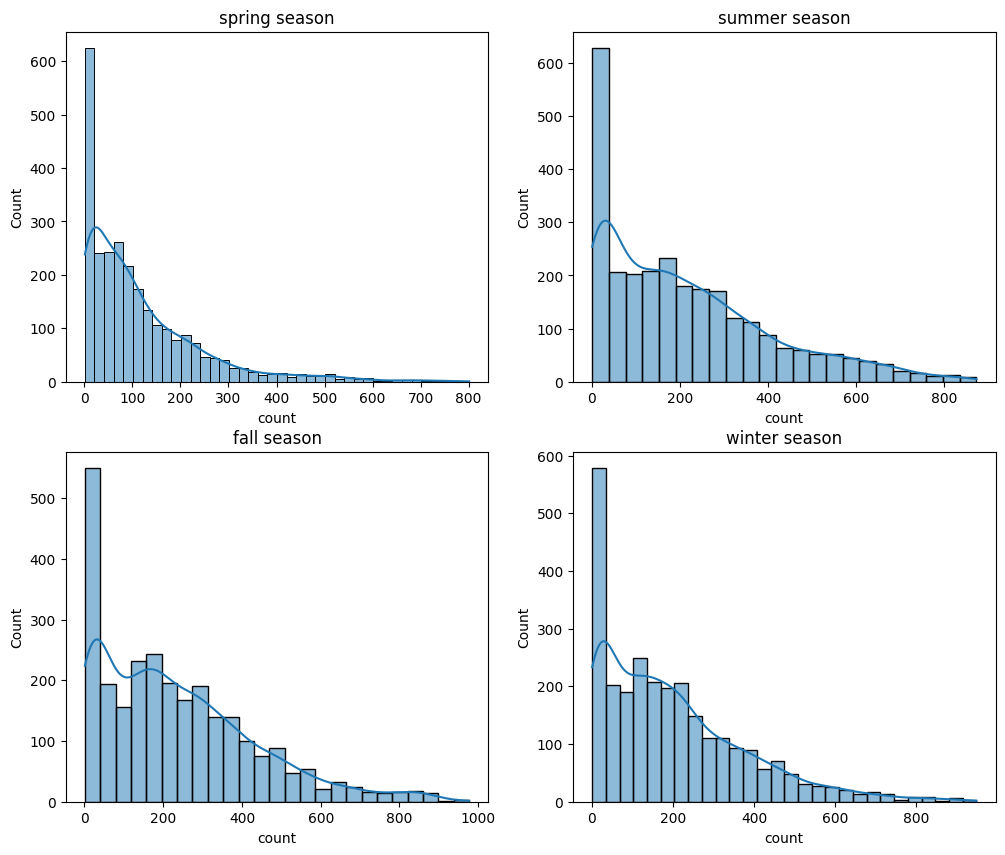

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.histplot(x=spring,kde=True)
plt.title('spring season')
plt.subplot(2,2,2)
sns.histplot(x= summer, kde= True)
plt.title('summer season')
plt.subplot(2,2,3)
sns.histplot(x= fall, kde= True)
plt.title('fall season')
plt.subplot(2,2,4)
sns.histplot(x= winter, kde= True)
plt.title('winter season')
plt.show()

Text(0.5, 1.0, 'spring season')

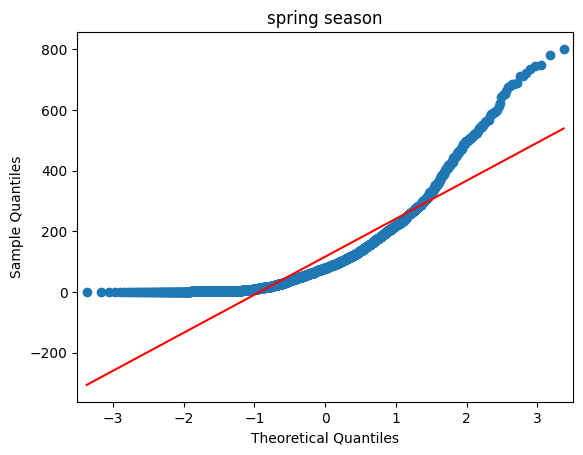

In [ ]:
qqplot(spring, line = 's')
plt.title('spring season')

<Figure size 400x100 with 0 Axes>

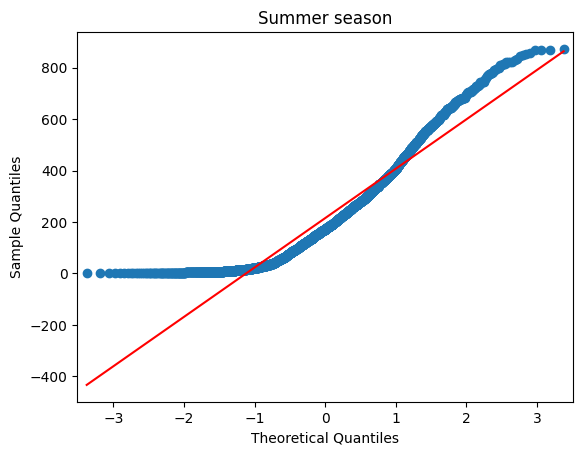

In [ ]:
plt.figure(figsize=(4,1))
qqplot(summer, line = 's')
plt.title("Summer season")
plt.show()

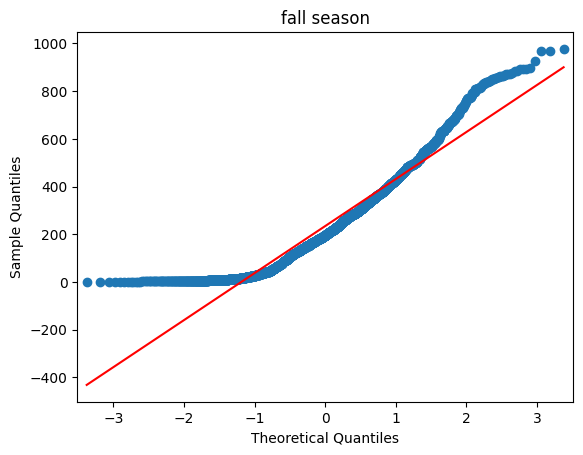

In [ ]:
qqplot(fall, line = 's')
plt.title('fall season')
plt.show()

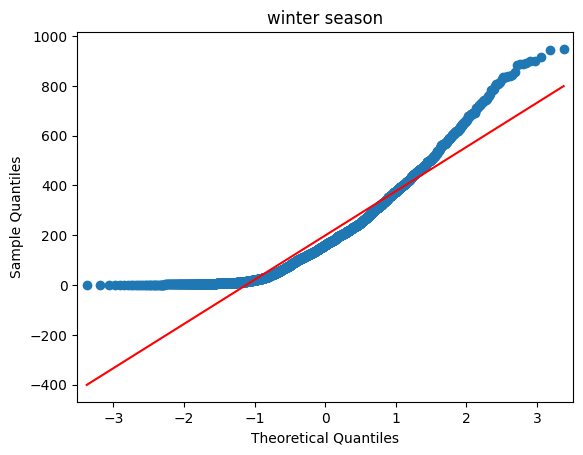

In [ ]:
qqplot(winter, line = 's')
plt.title('winter season')
plt.show()

From visul inspection test for nomality and equal variance is fail. Now we will do shapiroa and levene test

# Test for Normality

In [ ]:
# H0: Data is normally distributed
# H1: Data is non-normal
stat, p_value=shapiro(spring.sample(200))

alpha= 0.05
print('p Value:', p_value )

if p_value<alpha:
  print('Reject Null Hypothesis')
else:
  print("Fail to reject Null - Accept Null Hypothesis")

p Value: 1.5560519723862437e-13
Reject Null Hypothesis


In [ ]:
# H0: Data is normally distributed
# H1: Data is non-normal
stat, p_value=shapiro(summer.sample(200))

alpha= 0.05
print('p Value:', p_value )

if p_value<alpha:
  print('Reject Null Hypothesis')
else:
  print("Fail to reject Null - Accept Null Hypothesis")

p Value: 2.035746682338413e-09
Reject Null Hypothesis


In [ ]:
# H0: Data is normally distributed
# H1: Data is non-normal
stat, p_value=shapiro(fall.sample(200))

alpha= 0.05
print('p Value:', p_value )

if p_value<alpha:
  print('Reject Null Hypothesis')
else:
  print("Fail to reject Null - Accept Null Hypothesis")

p Value: 6.151129050557813e-10
Reject Null Hypothesis


In [ ]:
# H0: Data is normally distributed
# H1: Data is non-normal
stat, p_value=shapiro(winter.sample(200))

alpha= 0.05
print('p Value:', p_value )

if p_value<alpha:
  print('Reject Null Hypothesis')
else:
  print("Fail to reject Null - Accept Null Hypothesis")

p Value: 1.0626084900877686e-08
Reject Null Hypothesis


From shapiro test it can be concluded that data is not normally distributed.

## Levene test - test for variance

In [ ]:
levene_stat, p_value = levene(spring, summer, fall, winter)
print(p_value)
if p_value < 0.05:
 print("Reject the Null hypothesis.Variances are not equal")
else:
 print("Fail to Reject the Null hypothesis.Variances are equal")

1.0147116860043298e-118
Reject the Null hypothesis.Variances are not equal


From levene test we can say that data do not have equal variance . Now we will perform Krushkal warries test

In [ ]:
kruskal_stat, p_value = kruskal(spring, summer, fall, winter)
print("p_value===",p_value)
if p_value<0.05:
 print("Since p-value is less than 0.05, we reject the null hypothesis")

p_value=== 2.479008372608633e-151
Since p-value is less than 0.05, we reject the null hypothesis


Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of bicycle rented is not similar in different seasons.

# 6. Weather conditions are significantly different during different Seasons or not?

**Null Hypothesis (H0)**: Weather is independent of the season

**Alternate Hypothesis (H1)**: Weather is not independent of the season

**Significance level (alpha)**: 0.05

In [ ]:
pd.crosstab(df['season'], df['weather'])

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [ ]:
t_stat, p_value, dof, expected_freq= chi2_contingency(pd.crosstab(df['season'], df['weather']))

alpha= 0.05
print('p Value:', p_value )

if p_value<alpha:
  print('Reject Null Hypothesis')
else:
  print("Fail to reject Null - Accept Null Hypothesis")


p Value: 1.549925073686492e-07
Reject Null Hypothesis


Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that Weather is dependent on the season.


**Insights**
- In summer and fall seasons more bikes are rented as compared to other seasons.

- Whenever its a holiday more bikes are rented.

- It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.

- Whenever there is rain, thunderstorm, snow or fog, there were less bikes were
rented.

- Whenever the humidity is less than 20, number of bikes rented is very very low.

- Whenever the temperature is less than 10, number of bikes rented is less.

- Whenever the windspeed is greater than 35, number of bikes rented is less.

**Recommendations**

- In summer and fall seasons the company should have more bikes in stock to be
rented. Because the demand in these seasons is higher as compared to other
seasons.

- With a significance level of 0.05, workingday has no effect on the number of bikes being rented.

- In very low humid days, company should have less bikes in the stock to be rented.

- Whenever temperature is less than 10 or in very cold days, company should have
less bikes.

- Whenever the windspeed is greater than 35 or in thunderstorms, company should
have less bikes in stock to be rented.